In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from ipywidgets import interact
from sklearn.linear_model import BayesianRidge

##**$Miniproyecto$ $2$ $-$ $Tratamiento$ $de$ $señales$ $3$**

Manuel José Bothert Martínez, Yeison Monsalve Sanchez, Juan Manuel Marín Gallego, Alejandro Estrada Moscoso

In [4]:
data = pd.read_csv('Dataframe_Miniproyecto_1.csv') # Cargamos el dataframe.
data[8:15]

,Pot(SSA1),F_Pmax(SSA1),Energia(SSA1),Media(SSA1),Var(SSA1),Max(SSA1),Min(SSA1),Pot(SSA2),F_Pmax(SSA2),Energia(SSA2),Media(SSA2),Var(SSA2),Max(SSA2),Min(SSA2),Pot(SSA3),F_Pmax(SSA3),Energia(SSA3),Media(SSA3),Var(SSA3),Max(SSA3),Min(SSA3),Pot(SSA4),F_Pmax(SSA4),Energia(SSA4),Media(SSA4),Var(SSA4),Max(SSA4),Min(SSA4),Pot(SSA5),F_Pmax(SSA5),Energia(SSA5),Media(SSA5),Var(SSA5),Max(SSA5),Min(SSA5),Tipo
8,0.035104,1.367188,11.154716,0.003138,0.000029,0.035104,0.000833,0.002765,12.500000,0.335840,0.001281,6.303162e-07,0.002765,0.000506,0.001445,19.531250,0.071902,0.000511,2.295263e-07,0.001445,0.000019,0.001062,32.617188,0.044193,0.000386,1.387953e-07,0.001062,6.367957e-06,0.002113,49.21875,0.058845,0.000351,2.292611e-07,0.002113,0.000006,Tele
9,0.042193,1.367188,14.262410,0.003229,0.000038,0.042193,0.000806,0.002580,11.523438,0.262751,0.001287,5.917314e-07,0.002580,0.000527,0.001492,19.726562,0.044582,0.000514,2.309432e-07,0.001492,0.000028,0.001066,33.984375,0.026238,0.000386,1.377866e-07,0.001066,9.429427e-06,0.002074,49.21875,0.036900,0.000345,2.113730e-07,0.002074,0.000004,Tele
10,0.034473,1.367188,11.844372,0.003255,0.000031,0.034473,0.000862,0.002849,10.351562,0.322629,0.001385,6.660490e-07,0.002849,0.000574,0.001536,21.875000,0.056355,0.000541,2.492432e-07,0.001536,0.000035,0.001158,33.789062,0.034954,0.000408,1.534089e-07,0.001158,1.196343e-05,0.002091,49.21875,0.049755,0.000369,2.380012e-07,0.002091,0.000003,Tele
11,0.036316,1.367188,8.503438,0.003429,0.000034,0.036316,0.000907,0.003092,13.281250,0.368820,0.001414,7.169231e-07,0.003092,0.000578,0.001604,20.507812,0.076751,0.000566,2.798258e-07,0.001604,0.000036,0.001196,33.593750,0.048282,0.000428,1.720512e-07,0.001196,1.755161e-06,0.002336,49.21875,0.067193,0.000391,2.787730e-07,0.002336,0.000004,Tele
12,0.044911,1.953125,18.375712,0.003188,0.000054,0.044911,0.000519,0.003049,3.710938,0.208465,0.000925,3.700659e-07,0.003049,0.000374,0.000970,21.875000,0.018699,0.000349,1.026345e-07,0.000970,0.000029,0.000717,32.617188,0.010624,0.000263,6.133005e-08,0.000717,6.818951e-07,0.001320,49.21875,0.014890,0.000236,9.608029e-08,0.001320,0.000002,Tele
13,0.033775,1.367188,12.536587,0.003091,0.000030,0.033775,0.000772,0.003266,4.101562,0.327129,0.001443,6.519431e-07,0.003266,0.000633,0.001445,20.507812,0.045093,0.000515,2.220284e-07,0.001445,0.000043,0.001132,33.398438,0.028721,0.000393,1.422713e-07,0.001132,7.796155e-06,0.002154,49.21875,0.040739,0.000354,2.190907e-07,0.002154,0.000003,Tele
14,0.037148,1.367188,8.212883,0.003510,0.000035,0.037148,0.000929,0.003256,12.109375,0.379887,0.001456,7.959795e-07,0.003256,0.000584,0.001724,22.265625,0.071797,0.000583,2.963415e-07,0.001724,0.000034,0.001276,30.859375,0.039810,0.000438,1.802131e-07,0.001276,5.705679e-06,0.002428,49.21875,0.055403,0.000398,2.891785e-07,0.002428,0.000004,Tele


In [5]:
dataSismo = np.asarray(data.drop('Tipo',1))
#pca = PCA(n_components=2)

Tags = ["" for x in range(63)]
for i in range(0,21,1):
  Tags[i] = 0
for j in range(21,42,1):
  Tags[j] = 1
for l in range(42,63,1):
  Tags[l] = 2

print(Tags) 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [6]:
pca = PCA(n_components = 35)  # project from 64 to 2 dimensions
projectedZ = pca.fit_transform(dataSismo) # Entrenamos el modelo PCA (Calculamos los parámetros de proyección W, autovals, autovecs)
BasisW = pca.components_
print(data.shape)
print(projectedZ.shape)
print(pca.explained_variance_)
print(BasisW.shape)

(63, 36)
(63, 35)
[6.53777632e+02 4.85272696e+02 2.68812864e+02 1.61791766e+02
 8.23025263e+01 4.70666973e+01 1.99137523e+01 1.56547842e+00
 7.11385250e-02 4.94515873e-02 4.33659936e-05 1.96429931e-05
 1.09655388e-05 3.73777252e-06 1.44879301e-06 4.47993757e-08
 3.27131679e-08 1.83689989e-08 1.49092002e-08 7.81468676e-09
 2.81256345e-09 2.17638349e-09 8.56512189e-10 4.88184443e-10
 3.29702931e-10 5.72923405e-12 2.69879454e-13 1.17822922e-13
 4.65010642e-14 2.02280611e-15 2.83119639e-30 2.83119639e-30
 2.83119639e-30 2.83119639e-30 2.62999461e-31]
(35, 35)


(35,) 
 Explained variance 0.9999298688191215


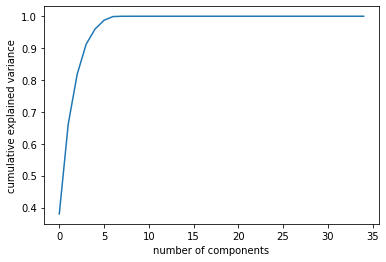

In [7]:
varExp = pca.explained_variance_ratio_
print(varExp.shape,'\n Explained variance',np.sum(varExp[:8]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

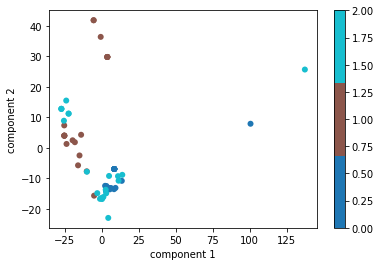

In [8]:
plt.scatter(projectedZ[:, 0], projectedZ[:, 2], c=Tags, edgecolor='none', cmap=plt.cm.get_cmap('tab10', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();